In [1]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


# OpenDevLibrary Project Cloning

In [3]:
cd /content

/content


In [4]:
!git clone "https://github.com/chenkenanalytic/OpenDevLibrary.git"

Cloning into 'OpenDevLibrary'...
remote: Enumerating objects: 84, done.
remote: Counting objects: 100% (84/84), done.
remote: Compressing objects: 100% (74/74), done.
remote: Total 287 (delta 26), reused 35 (delta 6), pack-reused 203
Receiving objects: 100% (287/287), 76.80 MiB | 28.35 MiB/s, done.
Resolving deltas: 100% (103/103), done.


# OpenVINO Installation

In [5]:
cd OpenDevLibrary/

/content/OpenDevLibrary


In [6]:
!python openvino_initialization_script.py

--2020-03-06 06:48:25--  https://storage.googleapis.com/open_vino_public/l_openvino_toolkit_p_2020.1.023.tgz
Resolving storage.googleapis.com (storage.googleapis.com)... 74.125.195.128, 2607:f8b0:400e:c07::80
Connecting to storage.googleapis.com (storage.googleapis.com)|74.125.195.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 508213676 (485M) [application/x-compressed]
Saving to: ‘l_openvino_toolkit_p_2020.1.023.tgz’

l_openvino_toolkit_ 100%[===================>] 484.67M  81.4MB/s    in 6.8s    

2020-03-06 06:48:32 (71.5 MB/s) - ‘l_openvino_toolkit_p_2020.1.023.tgz’ saved [508213676/508213676]


This script installs the following OpenVINO 3rd-party dependencies:
  1. GTK+, FFmpeg and GStreamer libraries used by OpenCV
  2. libusb library required for Myriad plugin for Inference Engine
  3. build dependencies for OpenVINO samples

Get:1 https://cloud.r-project.org/bin/linux/ubuntu bionic-cran35/ InRelease [3,626 B]
Ign:2 https://developer.download.nvidi

In [0]:
install_dir = '/opt/intel/openvino/'
model_optimizer = '/opt/intel/openvino/deployment_tools/model_optimizer/'
deployment_tools = '/opt/intel/openvino/deployment_tools/'
model_zoo = '/opt/intel/openvino/deployment_tools/open_model_zoo/'

# Downloading Model

In [8]:
!python $model_zoo'tools/downloader/'downloader.py --name face-detection-retail-0005 --precisions FP32-INT8 -o /content/OpenDevLibrary/demo_files/models

################|| Downloading models ||################

========== Downloading /content/OpenDevLibrary/demo_files/models/intel/face-detection-retail-0005/FP32-INT8/face-detection-retail-0005.xml
... 100%, 404 KB, 3719 KB/s, 0 seconds passed

========== Downloading /content/OpenDevLibrary/demo_files/models/intel/face-detection-retail-0005/FP32-INT8/face-detection-retail-0005.bin
... 100%, 4115 KB, 8457 KB/s, 0 seconds passed

################|| Post-processing ||################



# Running Inference

In [14]:
cd /content/OpenDevLibrary/demo_files/

/content/OpenDevLibrary/demo_files


In [15]:
!source /opt/intel/openvino/bin/setupvars.sh && python app.py -i "/content/OpenDevLibrary/demo_files/images/00e992ca.jpg" -t "FACE" -m "/content/OpenDevLibrary/demo_files/models/intel/face-detection-retail-0005/FP32-INT8/face-detection-retail-0005.xml" 

[setupvars.sh] OpenVINO environment initialized
Traceback (most recent call last):
  File "app.py", line 151, in <module>
    main()
  File "app.py", line 147, in main
    perform_inference(args)
  File "app.py", line 133, in perform_inference
    processed_output = process_func(output, image.shape)
TypeError: 'NoneType' object is not callable


# Output

In [11]:
cd /content/OpenDevLibrary/demo_files/outputs/

/content/OpenDevLibrary/demo_files/outputs


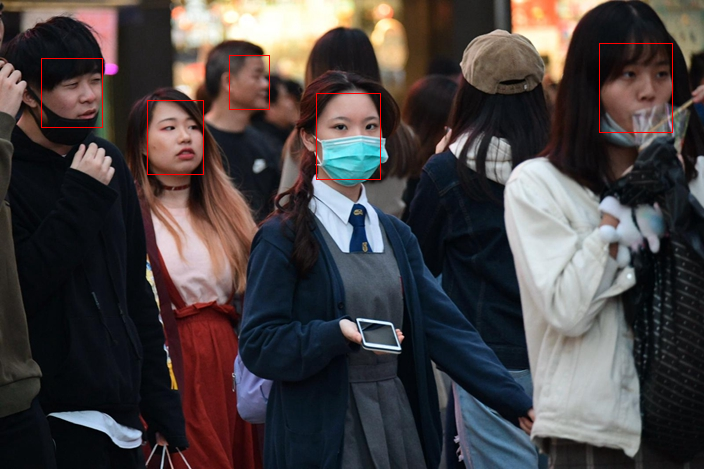

In [12]:
#!curl -o car.png
from google.colab.patches import cv2_imshow
import cv2


img = cv2.imread("CAR_META-output.png", cv2.IMREAD_UNCHANGED)
cv2_imshow(img)